# Overview
In this notebook, we will be getting 4-shot examples (Random, Rice) for imagenet and stanford cars

### Stanford Cars

In [8]:
import pandas as pd
test_data = pd.read_pickle("/project/pi_hongyu_umass_edu/zonghai/clinical-llm-alignment/durga_sandeep/icl-on-VLMs/flamingo/classification/stanford_cars/stanford_cars_test_data_1k_samples.pickle")
print(test_data.shape)
test_data.head(3)

(1000, 4)


,image,class,true_class_name,image_path
2478,02479.jpg,83,Dodge Caliber Wagon 2012,/scratch/workspace/dsaluru_umass_edu-email/sta...
7215,07216.jpg,83,Dodge Caliber Wagon 2012,/scratch/workspace/dsaluru_umass_edu-email/sta...
3898,03899.jpg,83,Dodge Caliber Wagon 2012,/scratch/workspace/dsaluru_umass_edu-email/sta...


In [2]:
import pandas as pd

basepath = "/project/pi_hongyu_umass_edu/zonghai/clinical-llm-alignment/durga_sandeep/icl-on-VLMs/flamingo/classification/stanford_cars"

df_random_four = pd.read_pickle(f"{basepath}/random_4_shot.pickle")
df_rice_four = pd.read_pickle(f"{basepath}/rice_four_shot.pickle")

In [4]:
df_random_four.head(2)

,index,target_label,pick_n_files_names,few_shot_query,raw_responses,predicted_label
0,0,Dodge Caliber Wagon 2012,[/scratch/workspace/dsaluru_umass_edu-email/st...,<image>\nQuestion: Identify and classify the c...,Dodge Journey 2012 |<endofchunk>|\n\n Questio...,Dodge Journey 2012
1,1,Dodge Caliber Wagon 2012,[/scratch/workspace/dsaluru_umass_edu-email/st...,<image>\nQuestion: Identify and classify the c...,Chrysler 300C AWD 2011 |<endofchunk>|\n\n Que...,Chrysler 300C AWD 2011


In [3]:
df_rice_four.head(2)

,index,target_label,pick_n_files_names,few_shot_query,raw_responses,predicted_label
0,0,Dodge Caliber Wagon 2012,[/scratch/workspace/dsaluru_umass_edu-email/st...,<image>\nQuestion: Identify and classify the c...,Dodge Journey SUV 2012 |<endofchunk>|\n\n Que...,Dodge Journey SUV 2012
1,1,Dodge Caliber Wagon 2012,[/scratch/workspace/dsaluru_umass_edu-email/st...,<image>\nQuestion: Identify and classify the c...,Dodge Journey SUV 2012 |<endofchunk>|\n\n Que...,Dodge Journey SUV 2012


In [19]:
print(df_random_four['few_shot_query'].iloc[0])

<image>
Question: Identify and classify the car in the provided image. Provide the label in the exact format: [Make] [Model] [Year].
Answer: BMW 1 Series Coupe 2012 |<endofchunk>|

<image>
Question: Identify and classify the car in the provided image. Provide the label in the exact format: [Make] [Model] [Year].
Answer: Scion xD Hatchback 2012 |<endofchunk>|

<image>
Question: Identify and classify the car in the provided image. Provide the label in the exact format: [Make] [Model] [Year].
Answer: Buick Verano Sedan 2012 |<endofchunk>|

<image>
Question: Identify and classify the car in the provided image. Provide the label in the exact format: [Make] [Model] [Year].
Answer: GMC Canyon Extended Cab 2012 |<endofchunk>|

<image>
Question: Identify and classify the car in the provided image. Provide the label in the exact format: [Make] [Model] [Year].
Answer:


In [20]:
import re
# Define the regex pattern to extract the content between 'Answer:' and '<endofchunk>|'
pattern = r'Answer:\s*(.*?)\s*\|<endofchunk>\|'

# Find all matches
matches = re.findall(pattern, df_random_four['few_shot_query'].iloc[0], re.DOTALL)

# Print out the results
for match in matches:
    print(match)

BMW 1 Series Coupe 2012
Scion xD Hatchback 2012
Buick Verano Sedan 2012
GMC Canyon Extended Cab 2012


In [24]:
df_random_four['random_bool'] = df_random_four.apply(lambda x: 1 if (x['predicted_label'] == x['target_label']) else 0, 1)
df_random_four['random_few_shot'] = df_random_four['pick_n_files_names'].tolist()
df_random_four['random_few_shot_query'] = df_random_four['few_shot_query'].tolist()
df_random_four['random_label'] = df_random_four['predicted_label'].tolist()

df_rice_four['rice_bool'] = df_rice_four.apply(lambda x: 1 if (x['predicted_label'] == x['target_label']) else 0, 1)
df_rice_four['rice_few_shot'] = df_rice_four['pick_n_files_names'].tolist()
df_rice_four['rice_label'] = df_rice_four['predicted_label'].tolist()
df_rice_four['rice_few_shot_query'] = df_rice_four['few_shot_query'].tolist()

In [25]:
final_df = test_data[['image', 'image_path', 'true_class_name']].copy()
final_df['random_few_shot'] = df_random_four['random_few_shot'].tolist()
final_df['random_few_shot_query'] = df_random_four['random_few_shot_query'].tolist()
final_df['random_label'] = df_random_four['random_label'].tolist()
final_df['random_bool'] = df_random_four['random_bool'].tolist()

final_df['rice_few_shot'] = df_rice_four['rice_few_shot'].tolist()
final_df['rice_few_shot_query'] = df_rice_four['rice_few_shot_query'].tolist()
final_df['rice_label'] = df_rice_four['rice_label'].tolist()
final_df['rice_bool'] = df_rice_four['rice_bool'].tolist()

In [26]:
final_df = final_df[(final_df['random_bool'] == 0) & (final_df['rice_bool'] == 1)]

In [27]:
sample = final_df.iloc[0]
sample

image                                                            07892.jpg
image_path               /scratch/workspace/dsaluru_umass_edu-email/sta...
true_class_name                                     Buick Enclave SUV 2012
random_few_shot          [/scratch/workspace/dsaluru_umass_edu-email/st...
random_few_shot_query    <image>\nQuestion: Identify and classify the c...
random_label                                 Cadillac CTS Coupe Sedan 2011
random_bool                                                              0
rice_few_shot            [/scratch/workspace/dsaluru_umass_edu-email/st...
rice_few_shot_query      <image>\nQuestion: Identify and classify the c...
rice_label                                          Buick Enclave SUV 2012
rice_bool                                                                1
Name: 7891, dtype: object

In [31]:
import random
index = random.randint(0, len(final_df)-1)

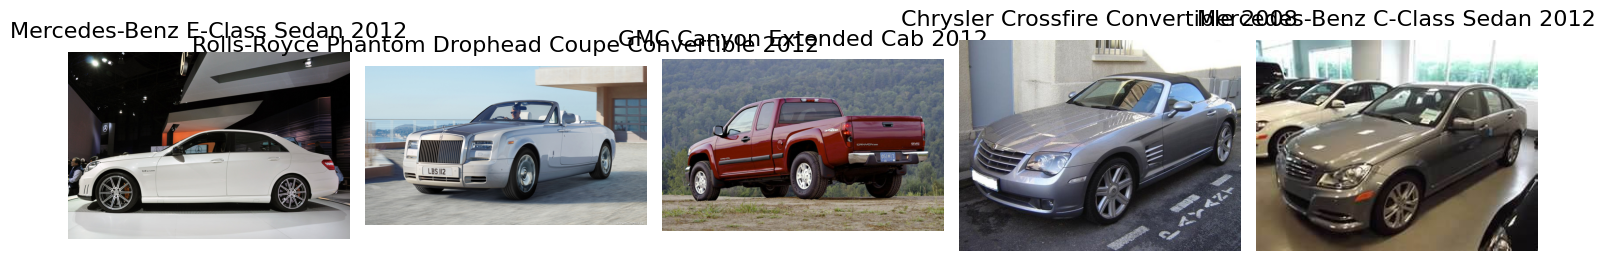

In [32]:
import matplotlib.pyplot as plt
from PIL import Image

sample = final_df.iloc[index]
image_paths = sample['random_few_shot'] + [sample['image_path']]

labels = re.findall(pattern, sample['random_few_shot_query'], re.DOTALL) + [sample['true_class_name']]

# Create a figure with 1 row and 3 columns
fig, axes = plt.subplots(1, len(labels), figsize=(15, 5))

# Loop through the images and their labels
for i in range(len(labels)):
    image = Image.open(image_paths[i])
    axes[i].imshow(image)
    axes[i].axis('off')  # Turn off axis

    # Set the label below the image using figtext for better control over font size and placement
    axes[i].set_title(labels[i], fontsize=16, pad=10)  # Set font size and padding for the label

# Adjust layout to ensure the images and labels do not overlap
plt.tight_layout()
plt.show()

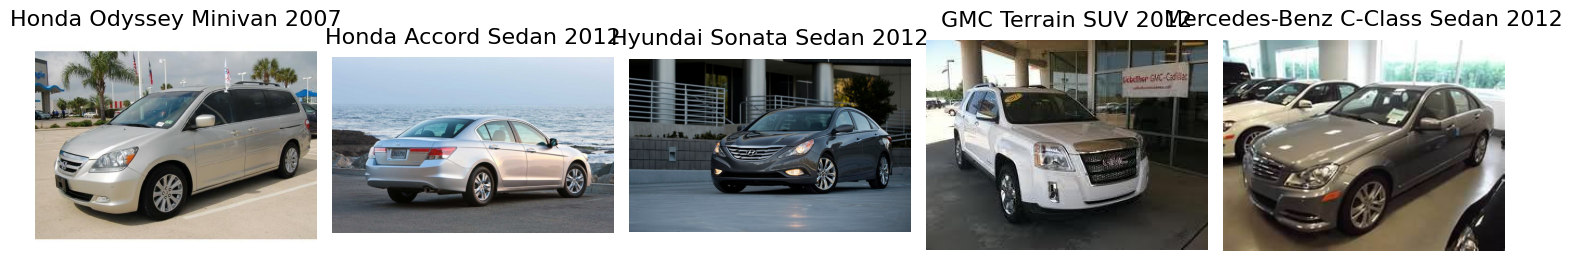

In [33]:
import matplotlib.pyplot as plt
from PIL import Image

sample = final_df.iloc[index]
image_paths = sample['rice_few_shot'] + [sample['image_path']]


labels = re.findall(pattern, sample['rice_few_shot_query'], re.DOTALL) + [sample['true_class_name']]

# Create a figure with 1 row and 3 columns
fig, axes = plt.subplots(1, len(labels), figsize=(15, 5))

# Loop through the images and their labels
for i in range(len(labels)):
    image = Image.open(image_paths[i])
    axes[i].imshow(image)
    axes[i].axis('off')  # Turn off axis

    # Set the label below the image using figtext for better control over font size and placement
    axes[i].set_title(labels[i], fontsize=16, pad=10)  # Set font size and padding for the label

# Adjust layout to ensure the images and labels do not overlap
plt.tight_layout()
plt.show()

### Imagenet

In [ ]:
with open("/project/pi_hongyu_umass_edu/zonghai/clinical-llm-alignment/durga_sandeep/icl-on-VLMs/flamingo/classification/imagenet/LOC_synset_mapping.txt", 'r') as f:
    mapping = f.readlines()
file_to_label_dict = {x.split(" ")[0] : (" ".join(x.replace("\n", "").lower().split(" ")[1:])).split(", ") for x in mapping}

In [ ]:
import pandas as pd
test_data = pd.read_pickle("/project/pi_hongyu_umass_edu/zonghai/clinical-llm-alignment/durga_sandeep/icl-on-VLMs/flamingo/classification/stanford_cars/stanford_cars_test_data_1k_samples.pickle")
print(test_data.shape)
test_data.head(3)

(1000, 4)


,image,class,true_class_name,image_path
2478,02479.jpg,83,Dodge Caliber Wagon 2012,/scratch/workspace/dsaluru_umass_edu-email/sta...
7215,07216.jpg,83,Dodge Caliber Wagon 2012,/scratch/workspace/dsaluru_umass_edu-email/sta...
3898,03899.jpg,83,Dodge Caliber Wagon 2012,/scratch/workspace/dsaluru_umass_edu-email/sta...


In [44]:
import pandas as pd

basepath = "/project/pi_hongyu_umass_edu/zonghai/clinical-llm-alignment/durga_sandeep/icl-on-VLMs/flamingo/classification"

df_random_four = pd.read_pickle(f"{basepath}/performance/data/imagenet_sample_test_dataset_1k_with_random_four_shot_prompt.pickle")
df_rice_four = pd.read_pickle(f"{basepath}/performance/data/imagenet_sample_test_dataset_1k_with_rice_four_shot_prompt.pickle")

image_basepath = "/scratch/workspace/dsaluru_umass_edu-email/imagenet/imagenet/val"
df_random_four['pick_n_files_names'] = df_random_four.apply(lambda x: [f"{image_basepath}/{x['pick_n_folders'][i]}/{x['pick_n_files_names'][i]}" for i in range(len(x['pick_n_folders']))], 1)
# df_rice_four['pick_n_files_names'] = df_rice_four.apply(lambda x: [f"{image_basepath}/{x['pick_n_folders'][i]}/{x['pick_n_files_names'][i]}" for i in range(len(x['pick_n_folders']))], 1)

In [45]:
test_data = df_random_four[['folder', 'filename', 'target_label']].copy()
test_data['true_class_name'] = test_data['target_label'].apply(lambda x: x[0])
test_data['image_path'] = test_data.apply(lambda x: f"/scratch/workspace/dsaluru_umass_edu-email/imagenet/imagenet/val/{x['folder']}/{x['filename']}",1)

In [46]:
df_random_four.head(2)

,folder,target_label,filename,pick_n_folders,pick_n_files_names,few_shot_query,raw_responses,predicted_label
0,n03769881,[minibus],ILSVRC2012_val_00033143.JPEG,"[n12768682, n02101006, n02481823, n02105505]",[/scratch/workspace/dsaluru_umass_edu-email/im...,<image>\nQuestion: Classify the image into one...,bus |<endofchunk>|\n\n Question,bus
1,n03769881,[minibus],ILSVRC2012_val_00049177.JPEG,"[n01641577, n04517823, n02101006, n01877812]",[/scratch/workspace/dsaluru_umass_edu-email/im...,<image>\nQuestion: Classify the image into one...,school bus |<endofchunk>|\n\n,school bus


In [47]:
df_rice_four.head(2)

,folder,target_label,filename,pick_n_files_names,few_shot_query,raw_responses,predicted_label
0,n03769881,[minibus],ILSVRC2012_val_00033143.JPEG,[/scratch/workspace/dsaluru_umass_edu-email/im...,<image>\nQuestion: Classify the image into one...,bus |<endofchunk>|\n\n Question,bus
1,n03769881,[minibus],ILSVRC2012_val_00049177.JPEG,[/scratch/workspace/dsaluru_umass_edu-email/im...,<image>\nQuestion: Classify the image into one...,school bus |<endofchunk>|\n\n,school bus


In [48]:
print(df_random_four['few_shot_query'].iloc[0])

<image>
Question: Classify the image into one of the imagenet1k label.
Answer: buckeye |<endofchunk>|

<image>
Question: Classify the image into one of the imagenet1k label.
Answer: gordon setter |<endofchunk>|

<image>
Question: Classify the image into one of the imagenet1k label.
Answer: chimpanzee |<endofchunk>|

<image>
Question: Classify the image into one of the imagenet1k label.
Answer: komondor |<endofchunk>|

<image>
Question: Classify the image into one of the imagenet1k label.
Answer:


In [49]:
import re
# Define the regex pattern to extract the content between 'Answer:' and '<endofchunk>|'
pattern = r'Answer:\s*(.*?)\s*\|<endofchunk>\|'

# Find all matches
matches = re.findall(pattern, df_random_four['few_shot_query'].iloc[0], re.DOTALL)

# Print out the results
for match in matches:
    print(match)

buckeye
gordon setter
chimpanzee
komondor


In [55]:
df_random_four['random_bool'] = df_random_four.apply(lambda x: 1 if (x['predicted_label'] in x['target_label']) else 0, 1)
df_random_four['random_few_shot'] = df_random_four['pick_n_files_names'].tolist()
df_random_four['random_few_shot_query'] = df_random_four['few_shot_query'].tolist()
df_random_four['random_label'] = df_random_four['predicted_label'].tolist()

df_rice_four['rice_bool'] = df_rice_four.apply(lambda x: 1 if (x['predicted_label'] in x['target_label']) else 0, 1)
df_rice_four['rice_few_shot'] = df_rice_four['pick_n_files_names'].tolist()
df_rice_four['rice_label'] = df_rice_four['predicted_label'].tolist()
df_rice_four['rice_few_shot_query'] = df_rice_four['few_shot_query'].tolist()

In [56]:
final_df = test_data.copy()
final_df['random_few_shot'] = df_random_four['random_few_shot'].tolist()
final_df['random_few_shot_query'] = df_random_four['random_few_shot_query'].tolist()
final_df['random_label'] = df_random_four['random_label'].tolist()
final_df['random_bool'] = df_random_four['random_bool'].tolist()

final_df['rice_few_shot'] = df_rice_four['rice_few_shot'].tolist()
final_df['rice_few_shot_query'] = df_rice_four['rice_few_shot_query'].tolist()
final_df['rice_label'] = df_rice_four['rice_label'].tolist()
final_df['rice_bool'] = df_rice_four['rice_bool'].tolist()

In [57]:
final_df = final_df[(final_df['random_bool'] == 0) & (final_df['rice_bool'] == 1)]

In [58]:
sample = final_df.iloc[0]
sample

folder                                                           n02123045
filename                                      ILSVRC2012_val_00012975.JPEG
target_label                                            [tabby, tabby cat]
true_class_name                                                      tabby
image_path               /scratch/workspace/dsaluru_umass_edu-email/ima...
random_few_shot          [/scratch/workspace/dsaluru_umass_edu-email/im...
random_few_shot_query    <image>\nQuestion: Classify the image into one...
random_label                                                        kitten
random_bool                                                              0
rice_few_shot            [/scratch/workspace/dsaluru_umass_edu-email/im...
rice_few_shot_query      <image>\nQuestion: Classify the image into one...
rice_label                                                           tabby
rice_bool                                                                1
Name: 44, dtype: object

In [66]:
import random
index = random.randint(0, len(final_df)-1)
index

22

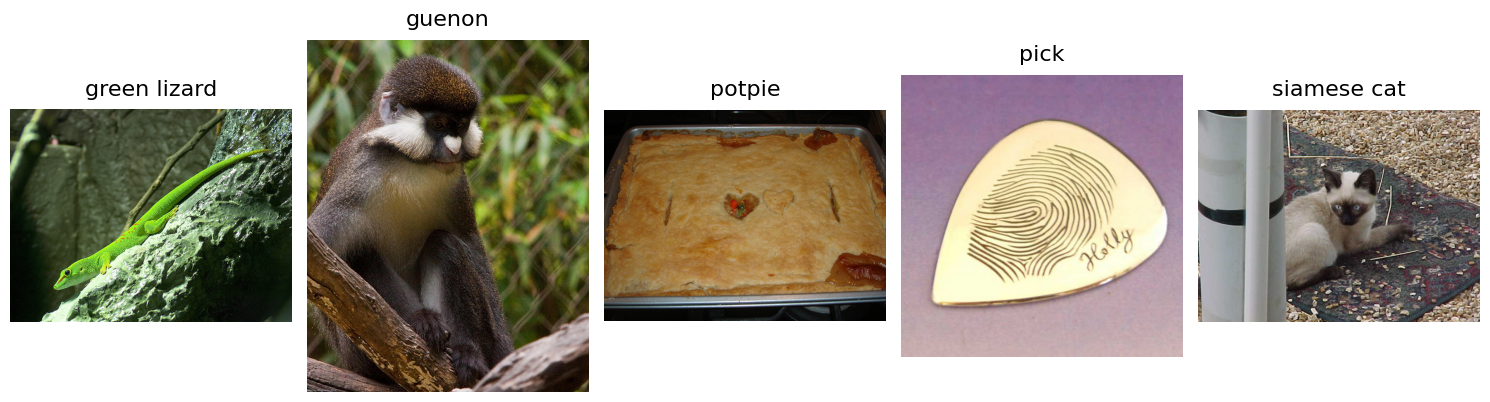

In [67]:
import matplotlib.pyplot as plt
from PIL import Image

sample = final_df.iloc[index]
image_paths = sample['random_few_shot'] + [sample['image_path']]

labels = re.findall(pattern, sample['random_few_shot_query'], re.DOTALL) + [sample['true_class_name']]

# Create a figure with 1 row and 3 columns
fig, axes = plt.subplots(1, len(labels), figsize=(15, 5))

# Loop through the images and their labels
for i in range(len(labels)):
    image = Image.open(image_paths[i])
    axes[i].imshow(image)
    axes[i].axis('off')  # Turn off axis

    # Set the label below the image using figtext for better control over font size and placement
    axes[i].set_title(labels[i], fontsize=16, pad=10)  # Set font size and padding for the label

# Adjust layout to ensure the images and labels do not overlap
plt.tight_layout()
plt.show()

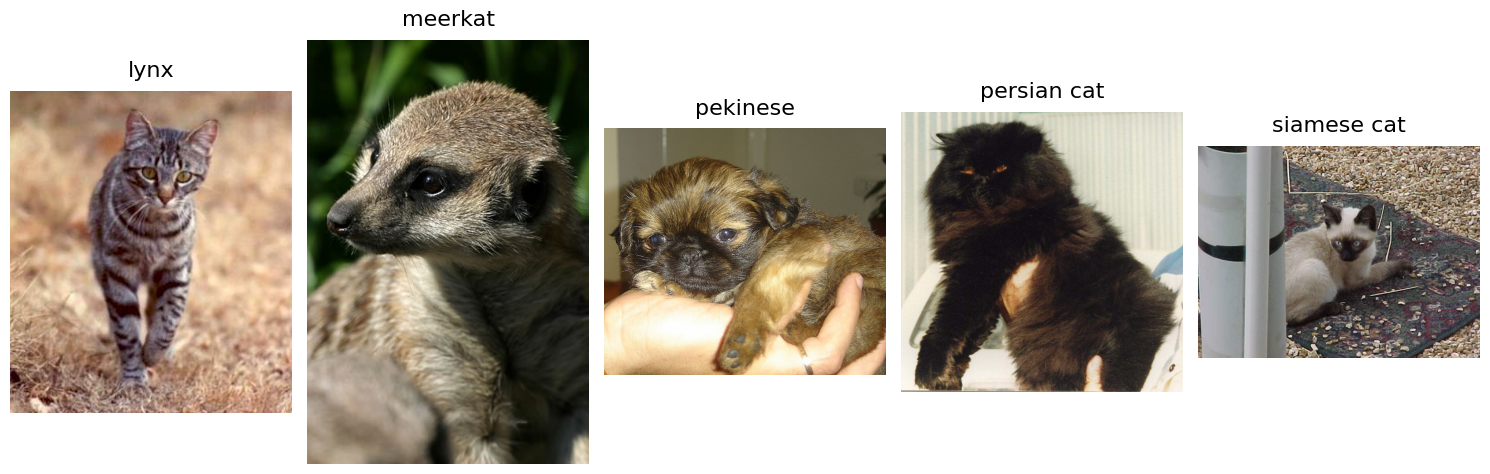

In [68]:
import matplotlib.pyplot as plt
from PIL import Image

sample = final_df.iloc[index]
image_paths = sample['rice_few_shot'] + [sample['image_path']]


labels = re.findall(pattern, sample['rice_few_shot_query'], re.DOTALL) + [sample['true_class_name']]

# Create a figure with 1 row and 3 columns
fig, axes = plt.subplots(1, len(labels), figsize=(15, 5))

# Loop through the images and their labels
for i in range(len(labels)):
    image = Image.open(image_paths[i])
    axes[i].imshow(image)
    axes[i].axis('off')  # Turn off axis

    # Set the label below the image using figtext for better control over font size and placement
    axes[i].set_title(labels[i], fontsize=16, pad=10)  # Set font size and padding for the label

# Adjust layout to ensure the images and labels do not overlap
plt.tight_layout()
plt.show()